# Проект: Определение перспективного тарифа для телеком компании


Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Оглавление: 
1. [Шаг 1. Откроем файл с данными и изучим общую информацию](#step1)  
2. [Шаг 2. Исследуем данные по тарифам smart и ultra ](#step2)  
3. [Шаг 3. Проверим гипотезы](#step3)
4. [Шаг 4. Итоговый вывод](#step4)

### Шаг 1. Откроем файл с данными и изучим общую информацию <a id="step1"></a> 

In [15]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats as st

In [16]:
calls = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv')
internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv')
messages = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')
tariffs = pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv')
users = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv')

In [17]:
tables = [calls, internet, messages, tariffs, users]
[display(i.head(10)) for i in tables]
[i.info() for i in tables]
[i.describe() for i in tables]
[i.isnull().sum() for i in tables]

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
<class 'pandas.core.frame.DataFrame'>
Rang

[id           0
 call_date    0
 duration     0
 user_id      0
 dtype: int64,
 Unnamed: 0      0
 id              0
 mb_used         0
 session_date    0
 user_id         0
 dtype: int64,
 id              0
 message_date    0
 user_id         0
 dtype: int64,
 messages_included        0
 mb_per_month_included    0
 minutes_included         0
 rub_monthly_fee          0
 rub_per_gb               0
 rub_per_message          0
 rub_per_minute           0
 tariff_name              0
 dtype: int64,
 user_id         0
 age             0
 churn_date    462
 city            0
 first_name      0
 last_name       0
 reg_date        0
 tariff          0
 dtype: int64]

In [18]:
#преобразуем типы данных, добавляем необходимые столбцы
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['duration_round'] = np.ceil(calls['duration'])
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

internet['mb_used_round'] = np.ceil(internet['mb_used'])
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages['messages'] = 1

users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
#users['how_long'] = users['churn_date'] - users['reg_date']

tariffs['gb_per_month_included'] = tariffs['mb_per_month_included'] / 1024

In [19]:
#сгруппируем данные
calls_new = calls.groupby(['user_id', 'month']).agg({'duration_round':'sum'})
internet_new = internet.groupby(['user_id', 'month']).agg({'mb_used_round': 'sum'})
messages_new = messages.groupby(['user_id', 'month']).agg({'messages': 'sum'})

In [20]:
#объединяем таблицы
new_table = calls_new.merge(internet_new, on=['user_id', 'month'], how = 'outer')
new_table = new_table.merge(messages_new, on=['user_id', 'month'], how = 'outer')
new_table = new_table.reset_index()
new_table = new_table.merge(users, on=['user_id'], how = 'outer')

new_table['gb_used_round'] = np.ceil(new_table['mb_used_round']/1024)

display(new_table.head())

,user_id,month,duration_round,mb_used_round,messages,age,churn_date,city,first_name,last_name,reg_date,tariff,gb_used_round
0,1000,5.0,159.0,2256.0,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3.0
1,1000,6.0,172.0,23257.0,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,23.0
2,1000,7.0,340.0,14016.0,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14.0
3,1000,8.0,408.0,14070.0,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14.0
4,1000,9.0,466.0,14581.0,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,15.0


In [22]:
print(len(new_table.query('churn_date!=churn_date')))

3027


Вывод:
Я загрузила 5 таблиц с данными: calls, internet, messages, tariffs, users. Преобразовала типы данных по некоторым столбцам, а также добавила колонку month, чтобы позже группировать по ней данные. Пропусков  в данных не было. Сгруппировав таблицы по колонкам user_id и month, я их соединила в таблицу new_table и теперь буду работать с ней.
Нулевые значения в звонках и Мб оставляем, т.к. таблицы содержат строки по дням и пользователи не каждый день пользовались интернетом, а нулевые звонки это скорее всего входящие. Более того нас интересует кол-во звонков и интернет-трафик в месяц, а не по дням, и нулевые значения не помешают группировке данных по месяцам. 

### Шаг 2. Исследуем данные по тарифам smart и ultra <a id="step2"></a> 

In [7]:
def month_price(x):
    minutes = 0
    messages = 0
    gb = 0
    if x['tariff'] == 'ultra':
        if x['duration_round']>tariffs['minutes_included'][1]:
            minutes = (x['duration_round']-tariffs['minutes_included'][1])*tariffs['rub_per_minute'][1]
        elif x['messages']>tariffs['messages_included'][1]:
            messages = (x['messages']-tariffs['messages_included'][1])*tariffs['rub_per_message'][1]
        elif x['gb_used_round']>tariffs['gb_per_month_included'][1]:
            gb = (x['gb_used_round']-tariffs['gb_per_month_included'][1])*tariffs['rub_per_gb'][1]
        return (minutes + messages + gb + tariffs['rub_monthly_fee'][1])
        
    elif x['tariff'] == 'smart':
        if x['duration_round']>tariffs['minutes_included'][0]:
            minutes = (x['duration_round']-tariffs['minutes_included'][0])*tariffs['rub_per_minute'][0]
        elif x['messages']>tariffs['messages_included'][0]:
            messages = (x['messages']-tariffs['messages_included'][0])*tariffs['rub_per_message'][0]
        elif x['gb_used_round']>tariffs['gb_per_month_included'][0]:
            gb = (x['gb_used_round']-tariffs['gb_per_month_included'][0])*tariffs['rub_per_gb'][0]
        return (minutes + messages + gb + tariffs['rub_monthly_fee'][0])
        
new_table['month_price'] = new_table.apply(month_price, axis = 1)

In [8]:
new_table.head(10)

,user_id,month,duration_round,mb_used_round,messages,age,churn_date,city,first_name,last_name,reg_date,tariff,gb_used_round,month_price
0,1000,5.0,159.0,2256.0,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3.0,1950.0
1,1000,6.0,172.0,23257.0,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,23.0,1950.0
2,1000,7.0,340.0,14016.0,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14.0,1950.0
3,1000,8.0,408.0,14070.0,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14.0,1950.0
4,1000,9.0,466.0,14581.0,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,15.0,1950.0
5,1000,10.0,350.0,14717.0,73.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,15.0,1950.0
6,1000,11.0,338.0,14768.0,58.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,15.0,1950.0
7,1000,12.0,333.0,9827.0,70.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,10.0,1950.0
8,1001,11.0,430.0,18452.0,NaN,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,19.0,1350.0
9,1001,12.0,414.0,14053.0,NaN,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,14.0,550.0


In [10]:
# разобьем таблицу на две smart и ultra

smart_data = new_table.query('tariff=="smart"')
ultra_data = new_table.query('tariff=="ultra"')

In [11]:
def describe_data(data, param, tariff):
    print("Тариф "+tariff)
    print()
    print("Минимум:", int(data[param].min()))
    print("Максимум:", int(data[param].max()))
    print("В среднем:", data[param].mean())
    print("Дисперсия:", np.var(data[param], ddof =1))
    print("Стандартное отклонение:", np.std(data[param], ddof=1))
    print()

    data.plot(kind = 'hist', y = param, bins=500)
    plt.title('Частотная гистограмма')
    plt.ylabel('Частота')
    plt.xlabel(param)
    plt.show()

Тариф smart

Минимум: 0
Максимум: 1435
В среднем: 419.0629779577148
Дисперсия: 35844.1895513438
Стандартное отклонение: 189.3256177894154



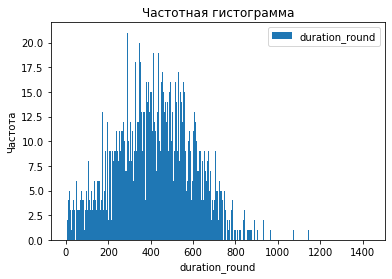

Тариф ultra

Минимум: 0
Максимум: 1673
В среднем: 545.4511041009464
Дисперсия: 94203.41839614812
Стандартное отклонение: 306.92575388218586



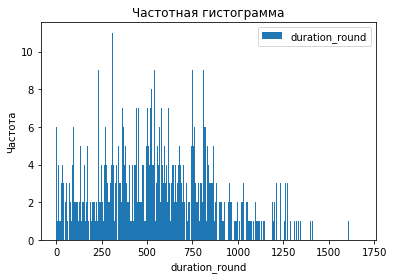

In [12]:
#количество минут в месяц
describe_data(smart_data, 'duration_round', 'smart')
describe_data(ultra_data, 'duration_round', 'ultra')

Тариф smart

Минимум: 1
Максимум: 143
В среднем: 38.71644120707596
Дисперсия: 717.5942011753547
Стандартное отклонение: 26.787948804926344



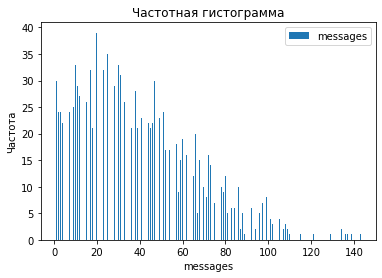

Тариф ultra

Минимум: 1
Максимум: 224
В среднем: 61.161006289308176
Дисперсия: 2109.6591828651995
Стандартное отклонение: 45.93102636416042



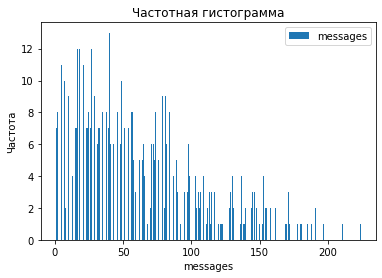

In [13]:
#количество сообщений в месяц
describe_data(smart_data, 'messages', 'smart')
describe_data(ultra_data, 'messages', 'ultra')

Тариф smart

Минимум: 0
Максимум: 38
В среднем: 16.36669658886894
Дисперсия: 33.05496582258378
Стандартное отклонение: 5.749344816810328



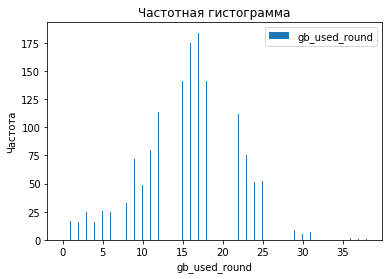

Тариф ultra

Минимум: 0
Максимум: 49
В среднем: 19.726153846153846
Дисперсия: 94.37975675248776
Стандартное отклонение: 9.714924433699306



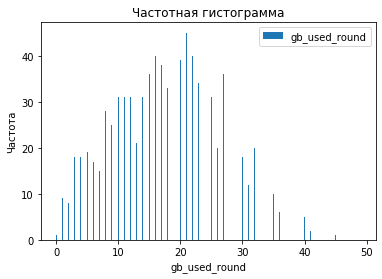

In [14]:
#количество гигабайт в месяц
describe_data(smart_data, 'gb_used_round', 'smart')
describe_data(ultra_data, 'gb_used_round', 'ultra')

In [15]:
#одна гистограмма для двух значений
def describe_data_on_one_hist(smart, ultra, param):
    plt.hist([smart[param], ultra[param]], bins = 100, alpha=0.5, label=['smart', 'ultra'])
    plt.title('Частотная гистограмма '+ param)
    plt.legend(loc='upper right')
    plt.ylabel('Частота')
    plt.xlabel(param)
    plt.show()

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


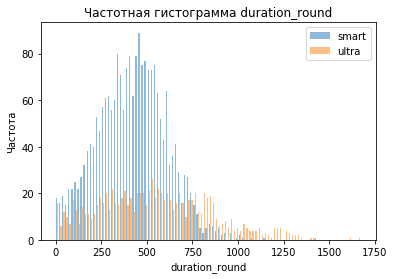

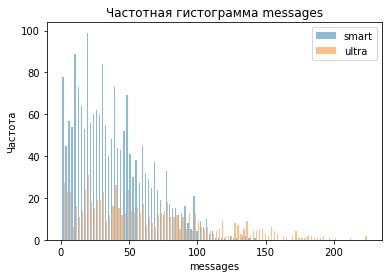

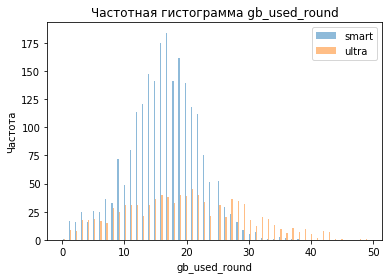

In [16]:
describe_data_on_one_hist(smart_data, ultra_data, 'duration_round')
describe_data_on_one_hist(smart_data, ultra_data, 'messages')
describe_data_on_one_hist(smart_data, ultra_data, 'gb_used_round')

Вывод:
Я построила гистограммы для количества минут, сообщений и объёма интернет-трафика в месяц для каждого тарифа (smart и ultra). Все гистограммы показывают распределение Пуассона. Частотная гистограмма расхода интернет-трафика выглядит наиболее приближенно к нормальному распределению.
Также для каждого вышеуказанного параметра в тарифе я нашла среднее, дисперсию и стандартное отклонение. Эти данные понадобятся нам в дальнейшем для удаления выбросов из таблиц и подтверждения гипотез.

Тариф smart: 
    Минуты:
        Минимум: 0, Максимум: 1435, Среднее: 419, Дисперсия: 35844.18, Стандартное отклонение: 189.32        
    Сообщения:
        Минимум: 1, Максимум: 143, В среднем: 39, Дисперсия: 717.59, Стандартное отклонение: 26.78
    Гигабайты:
        Минимум: 0, Максимум: 38, В среднем: 16.36, Дисперсия: 33, Стандартное отклонение: 5.75

Тариф ultra: 
    Минуты:
        Минимум: 0, Максимум: 1673, В среднем: 545.45, Дисперсия: 94203.4, Стандартное отклонение: 306.9      
    Сообщения:
        Минимум: 1, Максимум: 224, В среднем: 61, Дисперсия: 2109.65, Стандартное отклонение: 45.9
    Гигабайты:
        Минимум: 0, Максимум: 49, В среднем: 19.7, Дисперсия: 94.37, Стандартное отклонение: 9.7

### Шаг 3. Проверим гипотезы <a id="step3"></a> 

In [17]:
print(len(smart_data))
print(len(ultra_data))

2230
986


In [22]:
#проверяем гипотезу: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Н_о - средняя выручка равна.
alpha = 0.05
results = st.ttest_ind(smart_data['month_price'], ultra_data['month_price'])
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

if (results.pvalue < alpha) and (smart_data['month_price'].mean() < ultra_data['month_price'].mean()):
    print("Cредняя выручка пользователей тарифа «Ультра» больше, чем средняя выручка пользователей тарифа «Смарт»") 

p-значение: 0.0
Отвергаем нулевую гипотезу
Cредняя выручка пользователей тарифа «Ультра» больше, чем средняя выручка пользователей тарифа «Смарт»


In [23]:
#проверяем гипотезу: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
new_table = smart_data.merge(ultra_data, on = ['user_id', 'month', 'duration_round', 'mb_used_round', 'messages', 'age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff', 'gb_used_round', 'month_price'], how = 'outer')
new_moscow = new_table.query('city=="Москва"')
new_region = new_table.query('city!="Москва"')
alpha = 0.05
results = st.ttest_ind(new_moscow['month_price'], new_region['month_price'])
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

if (results.pvalue < alpha) and (new_moscow['month_price'].mean() > new_region['month_price'].mean()):
    print("Cредняя выручка пользователей из Москвы больше, чем средняя выручка пользователей из других регионов") 

p-значение: 0.0038016960225992474
Отвергаем нулевую гипотезу
Cредняя выручка пользователей из Москвы больше, чем средняя выручка пользователей из других регионов


Вывод:
Проверив гипотезу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Я отвергла нулевую гипотезу, а именно, то что средняя выручка пользователей тарифов «Ультра» и «Смарт» равны. Cредняя выручка пользователей тарифа «Ультра» больше, чем средняя выручка пользователей тарифа «Смарт»
Проверив гипотезу, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Я отвергла нулевую гипотезу, а именно, то что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов. Cредняя выручка пользователей из Москвы больше, чем средняя выручка пользователей из других регионов.

### Шаг 3. Итоговый вывод <a id="step4"></a> 

Я загрузила 5 таблиц с данными: calls (202607 строк и 4 колонки), internet (149396 строк и 4 колонки), messages (123036 строк и 3 колонки), tariffs (2 строки и 8 колонок), users (500 строк и 8 колонок). Преобразовала типы данных по столбцам с датами, а также добавила колонку month в таблицы calls, internet, messages, чтобы позже группировать по ней данные. Также согласно тарифам я добавила колонки с округленными вверх значениями по мегабайтам и минутам.Пропусков в данных не было.
Сгруппировав таблицы по колонкам calls, internet, messages по user_id и month, я их соединила в таблицу new_table, а затем подсоединила таблицу users по колонке 'user_id'. В итоге у меня получилась таблица new_table, с которой я и продолжила работать. 

Для удобства я разделила таблицу new_table на smart_data (данные, где пользователи пользуются только тарифом smart) и ultra_data (данные, где пользователи пользуются только тарифом ultra). Далее построила гистограммы для количества минут, сообщений и объёма интернет-трафика в месяц для каждого тарифа (smart и ultra). Все гистограммы показывают распределение Пуассона. Частотная гистограмма расхода интернет-трафика выглядит наиболее приближенно к нормальному распределению. Также для каждого вышеуказанного параметра в тарифе я нашла среднее, дисперсию и стандартное отклонение.

Тариф smart:
    Минуты: Минимум: 0, Максимум: 1435, Среднее: 419, Дисперсия: 35844.18, Стандартное отклонение: 189.32
    Сообщения: Минимум: 1, Максимум: 143, В среднем: 39, Дисперсия: 717.59, Стандартное отклонение: 26.78
    Гигабайты: Минимум: 0, Максимум: 38, В среднем: 16.36, Дисперсия: 33, Стандартное отклонение: 5.75

Тариф ultra:
    Минуты: Минимум: 0, Максимум: 1673, В среднем: 545.45, Дисперсия: 94203.4, Стандартное отклонение: 306.9
    Сообщения: Минимум: 1, Максимум: 224, В среднем: 61, Дисперсия: 2109.65, Стандартное отклонение: 45.9
    Гигабайты: Минимум: 0, Максимум: 49, В среднем: 19.7, Дисперсия: 94.37, Стандартное отклонение: 9.7
    
Приступим к проверке гипотез.
Во-первых, я проверила гипотезу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Проведя анализ, я отвергла нулевую гипотезу, а именно то, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равны. Cредняя выручка пользователей тарифа «Ультра» больше, чем средняя выручка пользователей тарифа «Смарт».
Во-вторых, проверила гипотезу, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Проведя анализ, я отвергла нулевую гипотезу, а именно, то что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов. Cредняя выручка пользователей из Москвы больше, чем средняя выручка пользователей из других регионов.

Итого:  тариф «Ультра» приносит компании больше денег компании. Согласно полученным данным, рекомендуется скорректировать рекламный бюджет, сделав акцент на рекламе тарифа «Ультра», причем более агрессивную рекламу провести в Москве, а не регионах.
